<a href="https://colab.research.google.com/github/Mariam-Mohsen/CODSOFT/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

In [87]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [62]:
data=pd.read_csv("advertising.csv")

In [63]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [64]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [66]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

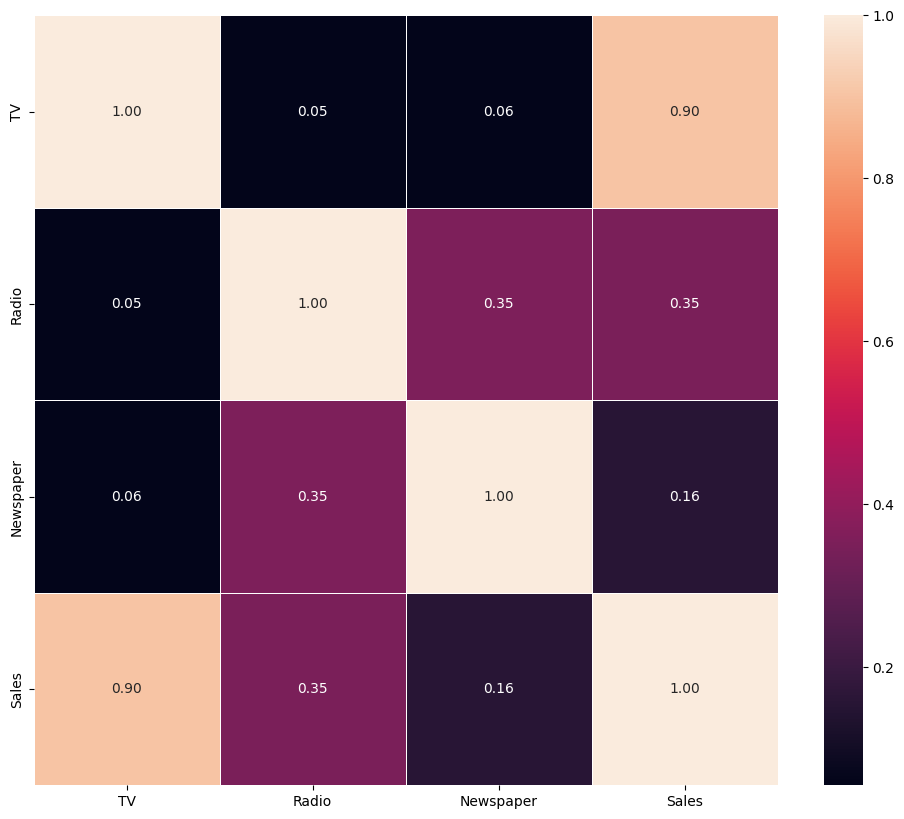

In [67]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.show()

In [89]:
label = data['Sales']
features = data[["TV", "Radio"]]

In [90]:
correlation= features.corrwith(label).sort_values(ascending=False)
print("Correlation with Label (Sales):")
correlation

Correlation with Label (Sales):


TV       0.901208
Radio    0.349631
dtype: float64

# Model

In [110]:
x=features
y=label

In [99]:
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [100]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [101]:
prediction = model.predict(X_test)
prediction

array([16.95537518, 20.36750946, 23.67877906,  9.23932462, 21.8589777 ,
       12.49890184, 21.14158798,  8.71453835, 17.26489488, 16.65891755,
        9.04850144,  8.44326393, 17.92443396,  8.17312478, 12.61199966,
       14.8739442 ,  8.09082502, 17.9679393 , 10.99191604, 20.57101437,
       20.63604288, 12.26621032, 11.0239442 , 22.2361825 ,  9.51268565,
        7.91404079, 20.86878181, 13.8814929 , 10.76286373,  8.05785124,
       15.9504224 , 10.68007267, 20.73382321, 10.22491484, 21.52687927,
       21.3167722 , 12.2771962 , 22.6941923 , 12.69753173,  6.45554633])

In [102]:
mse = mean_squared_error(y_test, prediction)
mse

2.846616122131541

In [103]:
r2_score(y_test, prediction)

0.9078797802624651

# Visualization


3D PLOT

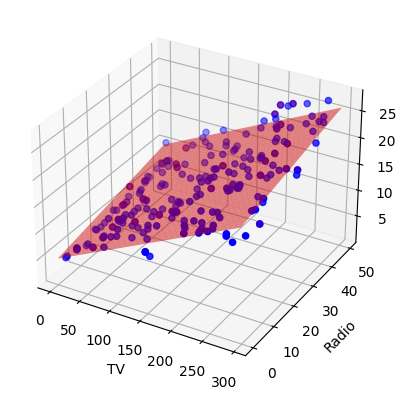

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x["TV"], x["Radio"], y, c='b')
ax.scatter(X_test["TV"], X_test["Radio"], y_test, c='r')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
xAxis, yAxis = np.meshgrid(np.linspace(x["TV"].min(), x["TV"].max(), 100), np.linspace(x["Radio"].min(), x["Radio"].max(), 100))
ZAxis = model.predict(pd.DataFrame({'TV': xAxis.flatten(), 'Radio': yAxis.flatten()}))
ax.plot_surface(xAxis, yAxis, ZAxis.reshape(xAxis.shape), color='r', alpha=0.5)
plt.show()

TRUE VS PREDICTED

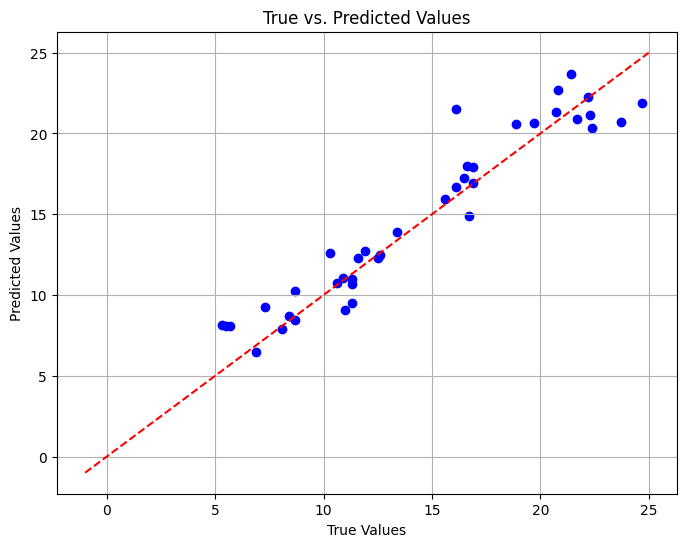

In [109]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction, color='blue')
plt.plot([-1, 25], [-1, 25], linestyle='--', color='red')
plt.title('True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()